## INDEXAÇÃO COM FATIAS OU SLICES 

In [1]:
import numpy as np

In [3]:
from IPython.display import Image

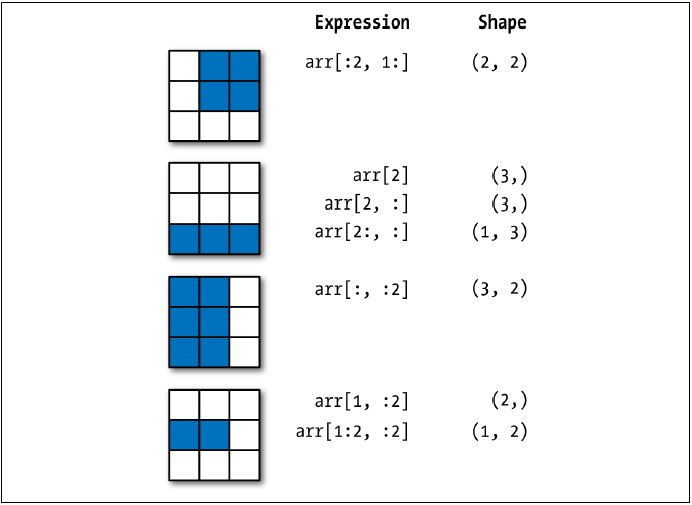

In [4]:
Image('slice.jpg')

## Idexação booleana

Vamos considerar um exemplo em que temos alguns dados em uma matriz e uma matriz de nomes
com duplicatas. Vou usar aqui a função randn em numpy.random para gerar
alguns dados aleatórios normalmente distribuídos:

In [5]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [6]:
data = np.random.randn(7,4)

In [7]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [14]:
data

array([[-5.19921045e-01,  9.33985504e-01, -1.03121520e-01,
        -1.22504340e+00],
       [-3.09254057e+00,  1.33313172e-01, -1.54760972e+00,
        -3.63291910e-01],
       [ 1.98072141e-01, -3.03078199e-01,  2.82870646e-01,
        -3.19396311e-01],
       [-7.51487849e-01,  1.97716719e-01,  1.43013500e-01,
        -2.18270022e+00],
       [-1.07109378e-01, -6.26090792e-01, -4.89089661e-02,
         1.81826065e+00],
       [ 1.08727062e+00,  5.60940903e-01,  2.01529490e-03,
        -5.47745396e-01],
       [-6.65303282e-01,  6.17430671e-01,  1.63313242e+00,
        -3.81717581e-01]])

Suponha que cada nome corresponda a uma linha na matriz de dados e que desejássemos selecionar
todas as linhas com o nome correspondente 'Bob'. Como operações aritméticas, comparações
(como ==) com matrizes também são vetorizadas. Assim, comparando nomes com o
string 'Bob' gera uma matriz booleana:

In [18]:
data[names == 'Bob']

array([[-0.51992104,  0.9339855 , -0.10312152, -1.2250434 ],
       [-0.75148785,  0.19771672,  0.1430135 , -2.18270022]])

A matriz booleana deve ter o mesmo comprimento que o eixo da matriz que está indexando. Você pode
misture e combine matrizes booleanas com fatias ou números inteiros (ou sequências de números inteiros;
mais sobre isso mais tarde).

Nestes exemplos, seleciono nas linhas em que names == 'Bob' e indexo as colunas,
também:

In [19]:
data[names == 'Bob',2:]

array([[-0.10312152, -1.2250434 ],
       [ 0.1430135 , -2.18270022]])

In [20]:
data[names == 'Bob',3:]

array([[-1.2250434 ],
       [-2.18270022]])

Para selecionar tudo, exceto 'Bob', você pode usar! = Ou negar a condição usando ~:

In [21]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [22]:
data[~(names == 'Bob')]

array([[-3.09254057e+00,  1.33313172e-01, -1.54760972e+00,
        -3.63291910e-01],
       [ 1.98072141e-01, -3.03078199e-01,  2.82870646e-01,
        -3.19396311e-01],
       [-1.07109378e-01, -6.26090792e-01, -4.89089661e-02,
         1.81826065e+00],
       [ 1.08727062e+00,  5.60940903e-01,  2.01529490e-03,
        -5.47745396e-01],
       [-6.65303282e-01,  6.17430671e-01,  1.63313242e+00,
        -3.81717581e-01]])

In [24]:
cond = names == "Bob"

In [28]:
data[~ cond]

array([[-3.09254057e+00,  1.33313172e-01, -1.54760972e+00,
        -3.63291910e-01],
       [ 1.98072141e-01, -3.03078199e-01,  2.82870646e-01,
        -3.19396311e-01],
       [-1.07109378e-01, -6.26090792e-01, -4.89089661e-02,
         1.81826065e+00],
       [ 1.08727062e+00,  5.60940903e-01,  2.01529490e-03,
        -5.47745396e-01],
       [-6.65303282e-01,  6.17430671e-01,  1.63313242e+00,
        -3.81717581e-01]])

Selecionando dois dos três nomes para combinar várias condições booleanas, use
operadores aritméticos booleanos como & (e) e | (ou):

In [31]:
mask = (names == "Bob") | (names == "will")

In [32]:
mask

array([ True, False, False,  True, False, False, False])

A seleção de dados de uma matriz por indexação booleana sempre cria uma cópia dos dados,
mesmo se a matriz retornada não for alterada.

Definir valores com matrizes booleanas funciona de maneira sensata. Para definir todos os
valores negativos em dados para 0, precisamos apenas fazer:

In [33]:
data[data < 0]

array([-0.51992104, -0.10312152, -1.2250434 , -3.09254057, -1.54760972,
       -0.36329191, -0.3030782 , -0.31939631, -0.75148785, -2.18270022,
       -0.10710938, -0.62609079, -0.04890897, -0.5477454 , -0.66530328,
       -0.38171758])

Como veremos mais adiante, esses tipos de operações em dados bidimensionais são convenientes
a ver com pandas.

## Indexação extravagante

Indexação extravagante é um termo adotado pelo NumPy para descrever a indexação usando matrizes inteiras.
Suponha que tivéssemos uma matriz 8 × 4:

In [34]:
arr = np.empty((8,4))

In [36]:
for i in range(8):
    arr[i] = i

In [37]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Para selecionar um subconjunto de linhas em uma ordem específica, você pode simplesmente passar uma lista ou
ndarray de números inteiros especificando a ordem desejada:

In [38]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Espero que este código tenha feito o que você esperava! O uso de índices negativos seleciona linhas de
o fim:

In [39]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passar várias matrizes de índice faz algo ligeiramente diferente; seleciona uma dimensão unidimensional
matriz de elementos correspondentes a cada tupla de índices:

In [40]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [41]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

Veremos o método de remodelagem com mais detalhes no Apêndice A.
Aqui os elementos (1, 0), (5, 3), (7, 1) e (2, 2) foram selecionados. Independentemente de
quantas dimensões a matriz possui (aqui, apenas 2), o resultado da indexação sofisticada é
sempre unidimensional.
O comportamento da indexação sofisticada nesse caso é um pouco diferente do que alguns usuários
poderia esperar (inclusive eu), que é a região retangular formada por
selecionando um subconjunto de linhas e colunas da matriz. Aqui está uma maneira de conseguir isso:

In [45]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Lembre-se de que a indexação sofisticada, ao contrário do fatiamento, sempre copia os dados em um novo
array.